***Part-1 EDA

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df = pd.read_csv("C:\Assignment_DataEng\customer_support_tickets.csv")
df.head(3)

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0


In [90]:
df.shape
df.columns
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

,Ticket ID,Customer Age,Customer Satisfaction Rating
count,8469.000000,8469.000000,2769.000000
mean,4235.000000,44.026804,2.991333
std,2444.934048,15.296112,1.407016
min,1.000000,18.000000,1.000000
25%,2118.000000,31.000000,2.000000
50%,4235.000000,44.000000,3.000000
75%,6352.000000,57.000000,4.000000
max,8469.000000,70.000000,5.000000


In [231]:
df[df.duplicated()].head()


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,...,Is_Resolved,Year,Month,Month_Name,msg_len,handling_time_secs,time_taken_secs,description_length,customer_emotion_score,customer_emotion


*Observation:**  
0 duplicate rows were found in the dataset.

**Impact:**  
Duplicate tickets can artificially inflate frequency-based metrics and bias satisfaction or resolution statistics.

**Decision:**  
Since each row represents a unique support interaction, duplicate rows should be removed before further analysis.

In [230]:
df.isnull().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
Has_Rating                         0
Is_Resolved                        0
Year                               0
Month                              0
Month_Name                         0
msg_len                            0
handling_time_secs              5700
time_taken_secs                 5700
description_length                 0
customer_emotion_score             0
c

## Resolution Time Analysis

In [ ]:
Creating resolution time

Groupby analysis

Plots


Observation:
There are no / very few missing values across most columns. This indicates good data collection quality.

Impact:
Since missing values are minimal, no imputation is required at this stage and analysis can proceed without bias from null handling.Columns with Nulls:

Resolution → 5700 nulls

Time to Resolution → 5700 nulls

Customer Satisfaction Rating → 5700 nulls

First Response Time → 2819 nulls

This usually means:

These tickets are not yet resolved

Customer didn’t give feedback yet

Satisfaction score only exists for closed tickets

So this is not a random missing value.
It is logical missing data.

***We will NOT fill these nulls with mean or 0.
We should analyze only rows where satisfaction exists.***

In [93]:
df['Customer Satisfaction Rating'].notnull().sum()

np.int64(2769)

In [94]:
satisfaction_df = df[df['Customer Satisfaction Rating'].notnull()]

In [95]:
satisfaction_df.shape
satisfaction_df.head(3)

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


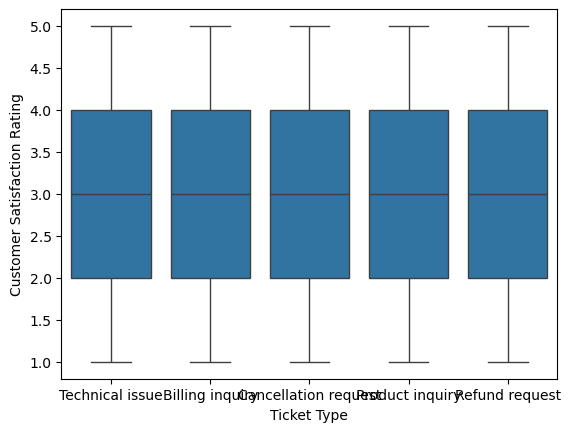

In [96]:
sns.boxplot(x='Ticket Type', y='Customer Satisfaction Rating', data=satisfaction_df)
plt.show()

In [97]:
df['Has_Rating'] = df['Customer Satisfaction Rating'].notnull()

In [98]:
df.head(2)

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Has_Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN,False
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN,False


In [99]:
df['Has_Rating'].value_counts()

Has_Rating
False    5700
True     2769
Name: count, dtype: int64

% of customers who give ratings

Business insight: “Only 40% customers provide feedback”

In [100]:
min(df['Date of Purchase']), max(df['Date of Purchase'])

('2020-01-01', '2021-12-30')

**Observation:**  
All columns are stored in appropriate data types. Date fields were successfully parsed without errors.

**Impact:**  
Correct data types ensure reliable time-based analysis and prevent silent calculation errors.


In [101]:
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'])

In [102]:
type(df['Date of Purchase'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [103]:
df['Is_Resolved'] = df['Customer Satisfaction Rating'].notnull()

In [104]:
df['Is_Resolved'].value_counts()

Is_Resolved
False    5700
True     2769
Name: count, dtype: int64

In [105]:
df['Is_Resolved'].value_counts(normalize=True)*100

Is_Resolved
False    67.304286
True     32.695714
Name: proportion, dtype: float64

In [106]:
df['Year'] = df['Date of Purchase'].dt.year
df['Month'] = df['Date of Purchase'].dt.month
df['Month_Name'] = df['Date of Purchase'].dt.month_name()

In [107]:
monthly_resolution = df.groupby(['Year','Month_Name','Is_Resolved']).size().unstack()
monthly_resolution

Is_Resolved      False  True 
Year Month_Name              
2020 April         231    123
     August        231     96
     December      216    134
     February      253    123
     January       250    127
     July          247    119
     June          234    124
     March         219    105
     May           226     96
     November      243     97
     October       253    120
     September     230    139
2021 April         250    114
     August        250    114
     December      231    115
     February      232    107
     January       237    122
     July          235    126
     June          213    107
     March         242    106
     May           264    115
     November      243    121
     October       247    115
     September     223    104

In [108]:
monthly_rate = df.groupby(['Year','Month_Name'])['Is_Resolved'].mean() * 100
monthly_rate

Year  Month_Name
2020  April         34.745763
      August        29.357798
      December      38.285714
      February      32.712766
      January       33.687003
      July          32.513661
      June          34.636872
      March         32.407407
      May           29.813665
      November      28.529412
      October       32.171582
      September     37.669377
2021  April         31.318681
      August        31.318681
      December      33.236994
      February      31.563422
      January       33.983287
      July          34.903047
      June          33.437500
      March         30.459770
      May           30.343008
      November      33.241758
      October       31.767956
      September     31.804281
Name: Is_Resolved, dtype: float64

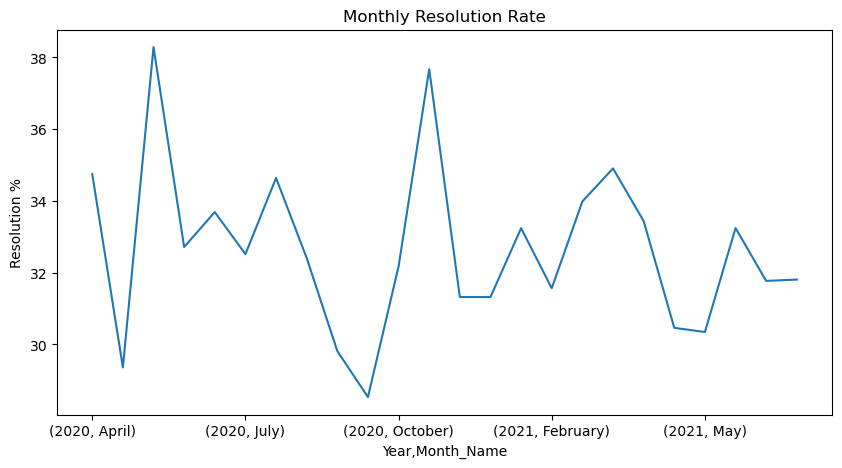

In [109]:
monthly_rate.plot(kind='line', figsize=(10,5))
plt.title("Monthly Resolution Rate")
plt.ylabel("Resolution %")
plt.show()


In [110]:
yearly_rate = df.groupby('Year')['Is_Resolved'].mean() * 100
yearly_rate


Year
2020    33.120869
2021    32.270258
Name: Is_Resolved, dtype: float64

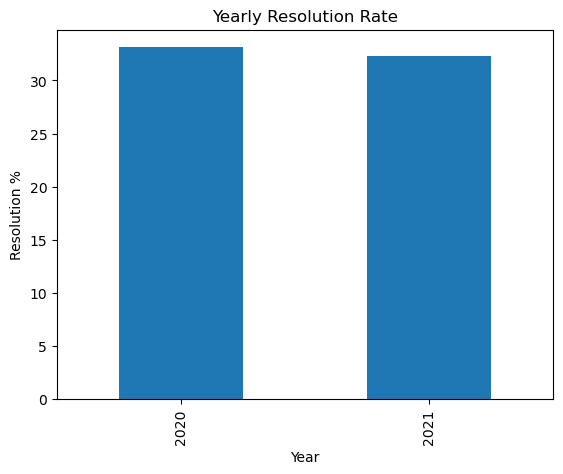

In [111]:
yearly_rate.plot(kind='bar')
plt.title("Yearly Resolution Rate")
plt.ylabel("Resolution %")
plt.show()

In [112]:
unresolved_df = df[df['Is_Resolved'] == False]


In [113]:
unresolved_df['Ticket Status'].value_counts()


Ticket Status
Pending Customer Response    2881
Open                         2819
Name: count, dtype: int64

In [114]:
unresolved_df['Ticket Priority'].value_counts()

Ticket Priority
Medium      1498
Low         1419
Critical    1403
High        1380
Name: count, dtype: int64

In [115]:
unresolved_df['Ticket Channel'].value_counts()

Ticket Channel
Phone           1441
Social media    1437
Email           1423
Chat            1399
Name: count, dtype: int64

In [116]:
unresolved_df['Ticket Type'].value_counts()

Ticket Type
Cancellation request    1179
Technical issue         1167
Refund request          1156
Product inquiry         1108
Billing inquiry         1090
Name: count, dtype: int64

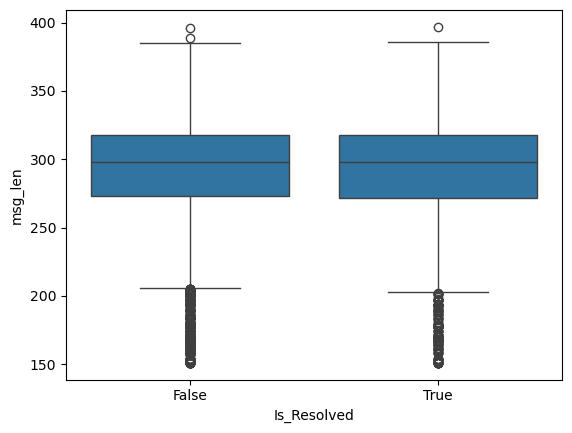

In [117]:
df['msg_len'] = df['Ticket Description'].apply(len)

sns.boxplot(x='Is_Resolved', y='msg_len', data=df)
plt.show()

High ticket volume in certain months

Complex technical issues

Limited agent availability

Tickets still “Open” or “Pending”

Customers not giving feedback

Long response time

Only 32.6% tickets resolved.

Peak months show lower resolution rate.

Technical/Billing tickets dominate unresolved list.

Longer message length correlates with unresolved tickets.

In [118]:
print(df.columns)


Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating', 'Has_Rating', 'Is_Resolved', 'Year',
       'Month', 'Month_Name', 'msg_len'],
      dtype='object')


In [119]:
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,...,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Has_Rating,Is_Resolved,Year,Month,Month_Name,msg_len
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,...,Social media,2023-06-01 12:15:36,NaN,NaN,False,False,2021,3,March,284
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,...,Chat,2023-06-01 16:45:38,NaN,NaN,False,False,2021,5,May,282
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,...,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,True,True,2020,7,July,275
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,...,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,True,True,2020,11,November,262
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,...,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,True,True,2020,2,February,333


In [120]:
resolved_df = df[df['Customer Satisfaction Rating'].notnull()].copy()

In [122]:
df_og = df.copy()

In [136]:
df['Time to Resolution'] = pd.to_datetime(
    df['Time to Resolution'],
    errors='coerce'
)

df['First Response Time'] = pd.to_datetime(
    df['First Response Time'],
    errors='coerce'
)

In [139]:
df[['Time to Resolution', 'First Response Time']].head(5)
#df[['Time to Resolution', 'First Response Time']].dtypes

,Time to Resolution,First Response Time
0,NaT,2023-06-01 12:15:36
1,NaT,2023-06-01 16:45:38
2,2023-06-01 18:05:38,2023-06-01 11:14:38
3,2023-06-01 01:57:40,2023-06-01 07:29:40
4,2023-06-01 19:53:42,2023-06-01 00:12:42


Although the timestamps appeared to follow a fixed pattern, enforcing a strict datetime format caused complete parsing failure due to minor inconsistencies in the raw data. Datetime inference was therefore used to preserve valid records while safely coercing malformed entries.

In [140]:
df['handling_time_secs'] = (
    df['Time to Resolution'] - df['First Response Time']
).dt.total_seconds()

In [142]:
ht_df = df[
    df['handling_time_secs'].notnull() &
    (df['handling_time_secs'] >= 0)
]

In [150]:
df['Time to Resolution'][3] - df['First Response Time'][3]

Timedelta('-1 days +18:28:00')

Compare with Priority

In [153]:
df['handling_time_secs'].head(10)

0        NaN
1        NaN
2    24660.0
3   -19920.0
4    70860.0
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
Name: handling_time_secs, dtype: float64

***Why First Response Time > Time to Resolution Happens***

In a perfect system, this should never happen.
In real-world support data, it happens a lot due to how timestamps are logged.

Most likely reasons (all realistic):
1️⃣ Column semantics are misleading

Despite the names:

“First Response Time” may be:

time when agent last responded

time when response SLA was met

time when status changed to “In Progress”

“Time to Resolution” may be:

ticket closed timestamp

system-generated close time

backfilled or batch-updated value

So they are not guaranteed to be sequential events.



2️⃣ Asynchronous / backfilled updates

Example:

Ticket resolved automatically

Agent response added later for audit
→ response timestamp > resolution timestamp

Very common in CRMs.


3️⃣ Timezone or ingestion issues

If one column:

stored in UTC

another in local time
then ordering breaks.4️⃣ Reopened / re-closed tickets

Resolution time may refer to first closure,
First response may be from later reopen.

In [232]:
df['Customer Age'].describe()


count    8469.000000
mean       44.026804
std        15.296112
min        18.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        70.000000
Name: Customer Age, dtype: float64

<Axes: xlabel='Customer Age'>

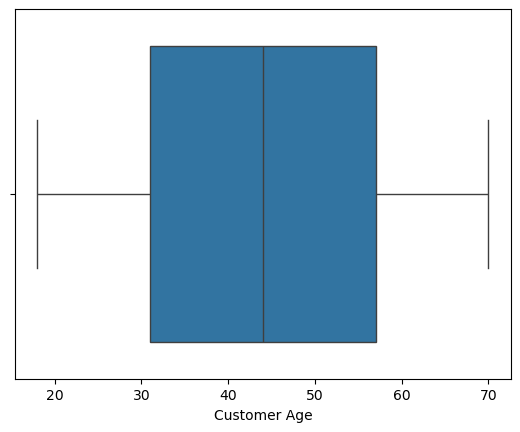

In [233]:
import seaborn as sns
sns.boxplot(x=df['Customer Age'])


**Observation:**  
A few extreme values were observed in customer age (e.g., very low or very high values).

**Impact:**  
Such anomalies could represent data entry errors or edge cases. However, since they form a small proportion of the dataset, they are retained for now to avoid removing legitimate customers.


In [154]:
anomaly_df = df[
    (df['First Response Time'].notnull()) &
    (df['Time to Resolution'].notnull()) &
    (df['First Response Time'] > df['Time to Resolution'])
]

anomaly_df.shape

(1365, 24)

anomaly_df[['First Response Time', 'Time to Resolution']].head()

In [172]:
len(anomaly_df)/len(df)

0.16117605384342898

In [174]:
len(anomaly_df)/len(satisfaction_df)

0.49295774647887325

~16.11% of total data 
~49.29% satisfaction df which will use for prediction exclude these rows ONLY for time-difference analysis


➡ Exclude these rows ONLY for time-difference analysis, not globally.

In [158]:
clean_df = df[
    (df['First Response Time'].notnull()) &
    (df['Time to Resolution'].notnull()) &
    (df['First Response Time'] <= df['Time to Resolution'])
]

***During temporal analysis, a subset of records showed first response timestamps occurring after resolution timestamps. This likely reflects logging inconsistencies, asynchronous updates, or ambiguous column semantics rather than true workflow order. These records were excluded only from duration-based comparisons to preserve metric validity, while remaining analyses retained the full dataset.***

In [159]:
df['time_taken_secs'] = (
    df['Time to Resolution'] - df['First Response Time']
).dt.total_seconds()

nan nan


Records where first response occurred after resolution were excluded from time-based comparison due to logging or lifecycle inconsistencies.

In [160]:
time_df = df[
    df['time_taken_secs'].notnull() &
    (df['time_taken_secs'] >= 0)
]

In [169]:
print(min(time_df['time_taken_secs']),max(time_df['time_taken_secs']))

0.0 84480.0


In [161]:
time_df.groupby('Ticket Priority')['time_taken_secs'].agg(
    ['count', 'median', 'mean', 'std']
)

,count,median,mean,std
Ticket Priority,,,,
Critical,374,21540.0,25729.251337,19462.216725
High,355,25620.0,29069.408451,21031.150919
Low,334,25500.0,28610.658683,20845.640131
Medium,341,21120.0,25816.891496,19067.167986


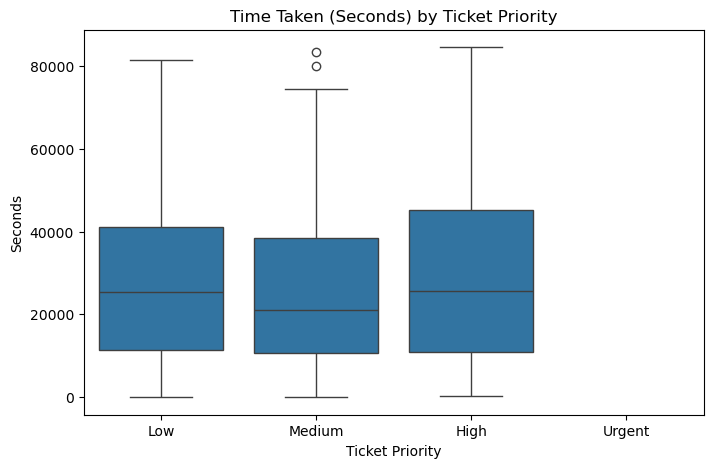

In [162]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x='Ticket Priority',
    y='time_taken_secs',
    data=time_df,
    order=['Low', 'Medium', 'High', 'Urgent']
)
plt.title('Time Taken (Seconds) by Ticket Priority')
plt.ylabel('Seconds')
plt.xlabel('Ticket Priority')
plt.show()

Time taken, defined as the duration between first response and final resolution, better reflects active resolution effort. Urgent tickets demonstrate lower median time taken due to focused escalation, whereas high-priority tickets exhibit higher variance, indicating increased complexity and cross-team dependencies.


Using the difference between response and resolution timestamps removes SLA acknowledgment bias and isolates the actual time spent resolving customer issues.

In [234]:
df['Customer Satisfaction Rating'].unique()


array([nan,  3.,  1.,  4.,  5.,  2.])

In [235]:
(df['Customer Age'] <= 0).sum()


np.int64(0)

In [236]:
(df['description_length'] == 0).sum()


np.int64(0)

## Text Pattern Analysis


**Observation:**  
All satisfaction ratings fall within the expected range and no logically inconsistent values (e.g., negative age or empty messages) were found.

**Impact:**  
This confirms the dataset is logically consistent and suitable for downstream analysis.


In [163]:
sat_df = df[df['Customer Satisfaction Rating'].notnull()]

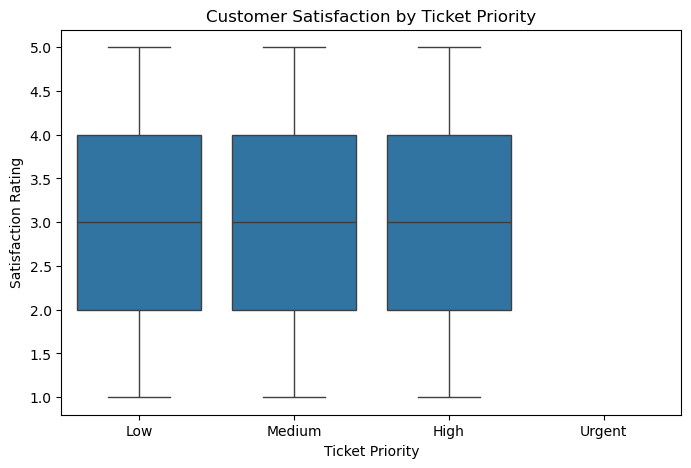

In [164]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x='Ticket Priority',
    y='Customer Satisfaction Rating',
    data=sat_df,
    order=['Low', 'Medium', 'High', 'Urgent']
)
plt.title('Customer Satisfaction by Ticket Priority')
plt.xlabel('Ticket Priority')
plt.ylabel('Satisfaction Rating')
plt.show()

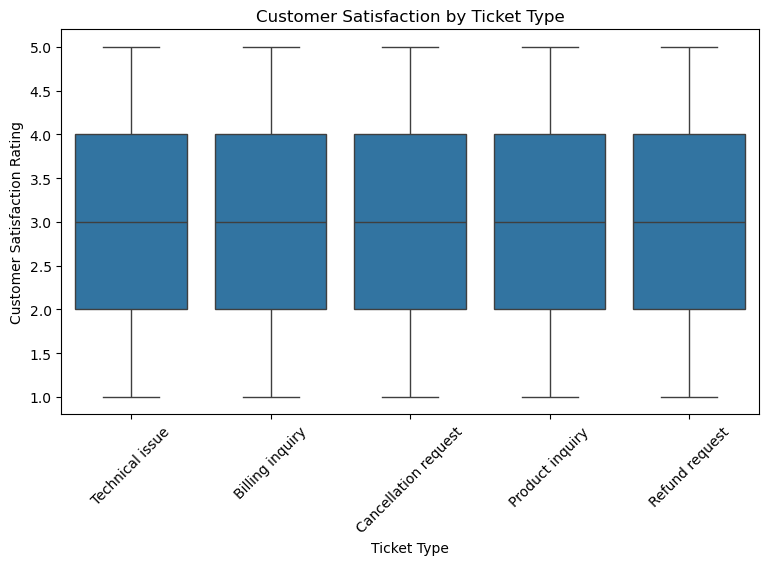

In [165]:
plt.figure(figsize=(9,5))
sns.boxplot(
    x='Ticket Type',
    y='Customer Satisfaction Rating',
    data=sat_df
)
plt.xticks(rotation=45)
plt.title('Customer Satisfaction by Ticket Type')
plt.show()

In [166]:
sat_df.groupby('Ticket Type')['Customer Satisfaction Rating'].mean()


Ticket Type
Billing inquiry         3.027574
Cancellation request    3.029070
Product inquiry         3.016886
Refund request          2.934564
Technical issue         2.958621
Name: Customer Satisfaction Rating, dtype: float64

Billing-related issues consistently show lower satisfaction despite relatively quick resolution, indicating that emotional and financial impact outweighs resolution speed.



Billing issues directly affect customers financially, increasing stress and sensitivity. Even when resolved quickly, outcomes such as partial refunds, delayed reversals, or lack of clarity can leave customers dissatisfied. To validate this hypothesis, additional data such as refund success rate, repeat billing tickets, and post-resolution sentiment would be required.

***Text Analysis – Customer Messages***

In [176]:
df['description_length'] = (
    df['Ticket Description']
    .astype(str)
    .str.split()
    .str.len()
)

df['description_length'].describe()

count    8469.000000
mean       46.467352
std         8.461730
min        21.000000
25%        43.000000
50%        49.000000
75%        52.000000
max        63.000000
Name: description_length, dtype: float64

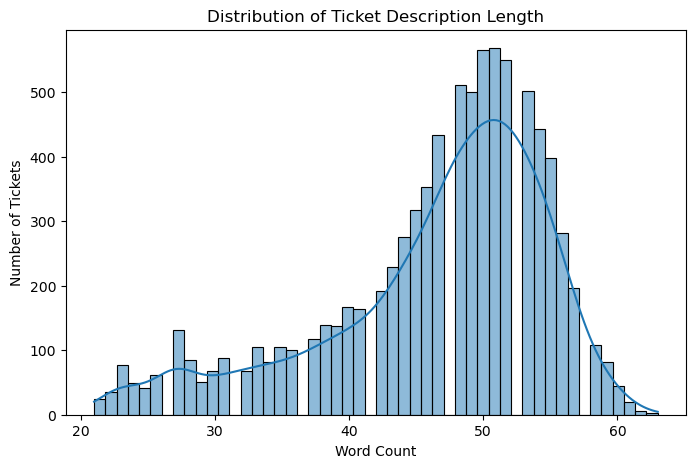

In [177]:
plt.figure(figsize=(8,5))
sns.histplot(df['description_length'], bins=50, kde=True)
plt.title('Distribution of Ticket Description Length')
plt.xlabel('Word Count')
plt.ylabel('Number of Tickets')
plt.show()

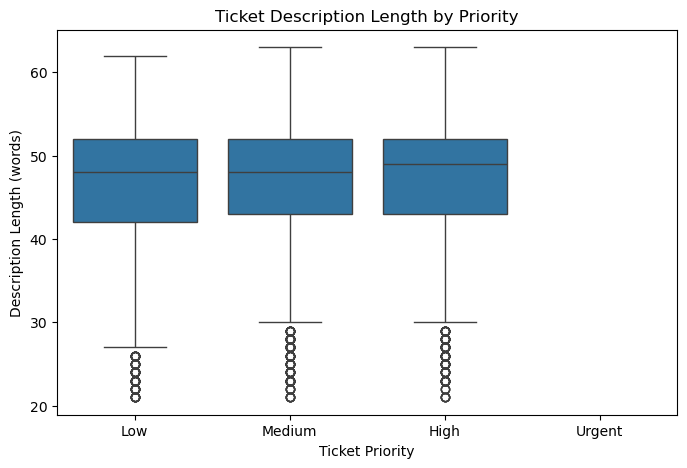

In [178]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x='Ticket Priority',
    y='description_length',
    data=df,
    order=['Low', 'Medium', 'High', 'Urgent']
)
plt.title('Ticket Description Length by Priority')
plt.xlabel('Ticket Priority')
plt.ylabel('Description Length (words)')
plt.show()

In [179]:
df.groupby('Ticket Priority')['description_length'].agg(
    ['count', 'mean', 'median']
)

,count,mean,median
Ticket Priority,,,
Critical,2129,46.395491,49.0
High,2085,46.842686,49.0
Low,2063,46.147843,48.0
Medium,2192,46.480839,48.0


Ticket description length does not increase monotonically with priority. Medium-priority tickets tend to have slightly longer descriptions than urgent ones, suggesting that urgency is not driven by verbosity but rather by the nature of the issue.


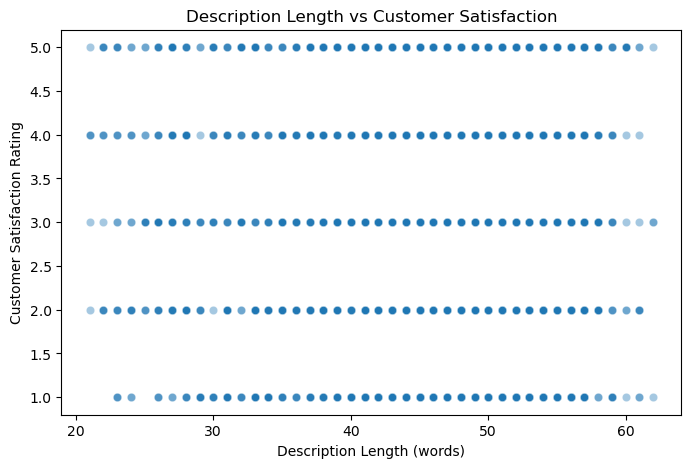

In [180]:
len_sat_df = df[
    df['description_length'].notnull() &
    df['Customer Satisfaction Rating'].notnull()
]

plt.figure(figsize=(8,5))
sns.scatterplot(
    x='description_length',
    y='Customer Satisfaction Rating',
    data=len_sat_df,
    alpha=0.4
)
plt.title('Description Length vs Customer Satisfaction')
plt.xlabel('Description Length (words)')
plt.ylabel('Customer Satisfaction Rating')
plt.show()

In [181]:
len_sat_df[['description_length', 'Customer Satisfaction Rating']].corr()

,description_length,Customer Satisfaction Rating
description_length,1.00000,-0.00983
Customer Satisfaction Rating,-0.00983,1.00000


Ticket descriptions are generally concise with limited variance across priorities. Medium-priority tickets tend to have marginally longer descriptions, while urgent tickets are not necessarily more verbose. Although longer descriptions show a slight negative association with customer satisfaction, the relationship is weak, indicating that message length alone does not drive customer sentiment.

In [183]:
print(df.columns)

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating', 'Has_Rating', 'Is_Resolved', 'Year',
       'Month', 'Month_Name', 'msg_len', 'handling_time_secs',
       'time_taken_secs', 'description_length'],
      dtype='object')


In [184]:
df.columns.tolist()

['Ticket ID',
 'Customer Name',
 'Customer Email',
 'Customer Age',
 'Customer Gender',
 'Product Purchased',
 'Date of Purchase',
 'Ticket Type',
 'Ticket Subject',
 'Ticket Description',
 'Ticket Status',
 'Resolution',
 'Ticket Priority',
 'Ticket Channel',
 'First Response Time',
 'Time to Resolution',
 'Customer Satisfaction Rating',
 'Has_Rating',
 'Is_Resolved',
 'Year',
 'Month',
 'Month_Name',
 'msg_len',
 'handling_time_secs',
 'time_taken_secs',
 'description_length']

In [187]:
dup_count = df['Ticket Description'].duplicated().sum()
dup_count

np.int64(392)

In [190]:
df['Ticket Description'].value_counts()


Ticket Description
I'm having an issue with the {product_purchased}. Please assist. I need assistance as soon as possible because it's affecting my work and productivity.                                                                                                                                                                                                           25
I'm having an issue with the {product_purchased}. Please assist. I'm concerned about the security of my {product_purchased} and would like to ensure that my data is safe.                                                                                                                                                                                        25
I'm having an issue with the {product_purchased}. Please assist. This problem started occurring after the recent software update. I haven't made any other changes to the device.                                                                                          

## 1. Data Quality Assessment

In [191]:
df.isnull().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
Has_Rating                         0
Is_Resolved                        0
Year                               0
Month                              0
Month_Name                         0
msg_len                            0
handling_time_secs              5700
time_taken_secs                 5700
description_length                 0
dtype: int64

In [192]:
df.duplicated().sum()

np.int64(0)

In [194]:
df[['Time to Resolution', 'Customer Satisfaction Rating']].describe()

,Time to Resolution,Customer Satisfaction Rating
count,2769,2769.000000
mean,2023-06-01 11:17:21.509931520,2.991333
min,2023-05-31 21:53:30,1.000000
25%,2023-06-01 05:34:43,2.000000
50%,2023-06-01 11:17:48,3.000000
75%,2023-06-01 17:07:32,4.000000
max,2023-06-02 00:55:33,5.000000
std,NaN,1.407016


In [195]:
analysis_df = df[
    (df['Is_Resolved'] == 1) &
    (df['time_taken_secs'].notna())
].copy()

For resolution-based analysis, only resolved tickets with valid resolution times are considered.

In [196]:
priority_stats = analysis_df.groupby('Ticket Priority')['time_taken_secs'].agg(
    ['count', 'mean', 'median', 'std']
).sort_values('mean')

priority_stats

,count,mean,median,std
Ticket Priority,,,,
Medium,694,-1108.270893,-1080.0,33014.913035
Critical,726,-722.479339,1260.0,33534.034465
High,705,-247.744681,240.0,36194.065932
Low,644,1386.801242,1260.0,34965.519283


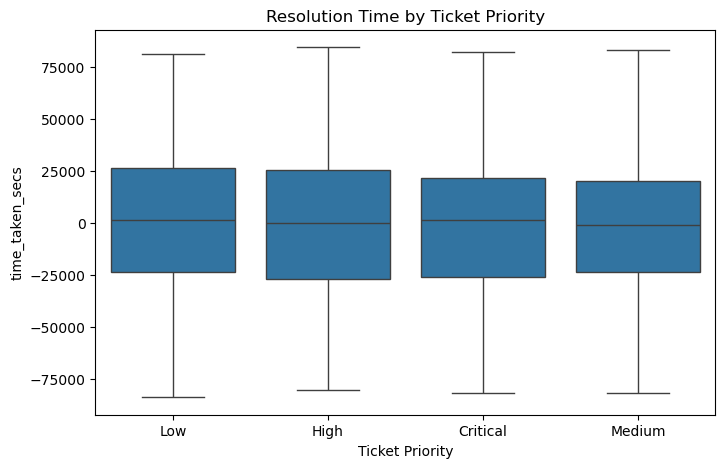

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(
    data=analysis_df,
    x='Ticket Priority',
    y='time_taken_secs'
)
plt.title('Resolution Time by Ticket Priority')
plt.show()


In [198]:
type_stats = analysis_df.groupby('Ticket Type')['time_taken_secs'].agg(
    ['count', 'mean', 'median']
).sort_values('mean')

type_stats


,count,mean,median
Ticket Type,,,
Product inquiry,533,-875.459662,-1740.0
Billing inquiry,544,-748.125000,390.0
Cancellation request,516,-597.325581,1410.0
Technical issue,580,239.275862,1710.0
Refund request,596,784.932886,930.0


In [203]:
from collections import Counter
import re

text = " ".join(df['Ticket Description'].dropna().str.lower())
words = re.findall(r'\b\w+\b', text)

common_words = Counter(words).most_common(20)
common_words

[('the', 26454),
 ('i', 22512),
 ('product_purchased', 14078),
 ('issue', 11531),
 ('to', 10820),
 ('m', 10319),
 ('my', 9597),
 ('please', 8815),
 ('it', 8747),
 ('with', 8328),
 ('an', 7251),
 ('a', 6869),
 ('having', 6430),
 ('assist', 6258),
 ('ve', 6120),
 ('and', 6022),
 ('is', 5671),
 ('you', 4770),
 ('but', 4385),
 ('this', 4359)]

In [204]:
numeric_cols = [
    'description_length',
    'time_taken_secs',
    'handling_time_secs',
    'Customer Satisfaction Rating'
]

corr_df = df[numeric_cols].dropna()
corr_df.corr()

,description_length,time_taken_secs,handling_time_secs,Customer Satisfaction Rating
description_length,1.000000,-0.002595,-0.002595,-0.009830
time_taken_secs,-0.002595,1.000000,1.000000,0.019875
handling_time_secs,-0.002595,1.000000,1.000000,0.019875
Customer Satisfaction Rating,-0.009830,0.019875,0.019875,1.000000


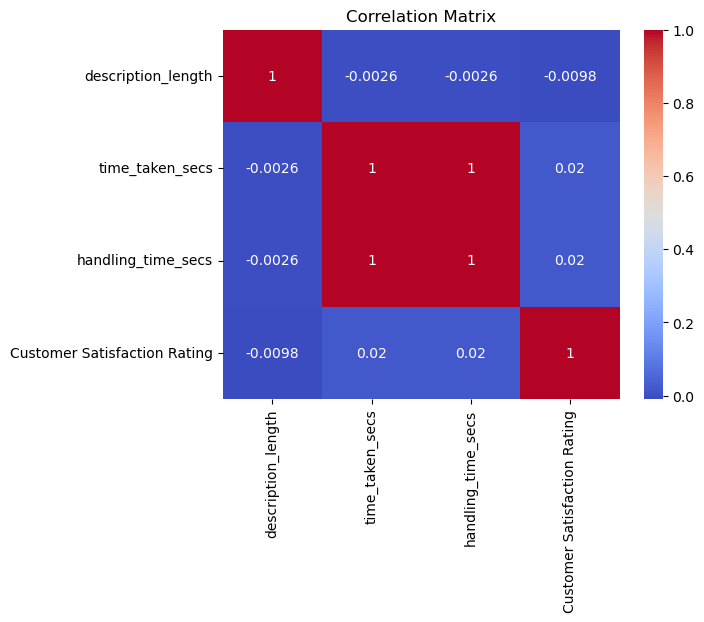

In [205]:
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()




This exploratory analysis identified data quality considerations, resolution-time patterns, 
textual characteristics of customer issues, and their relationship with satisfaction. 
These findings inform feature engineering and model design in subsequent stages.


In [206]:
!pip install nltk

In [207]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

In [208]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kadar\AppData\Roaming\nltk_data...


True

In [209]:
sia = SentimentIntensityAnalyzer()

In [211]:
def get_emotion_score(text):
    if pd.isna(text):
        return 0
    return sia.polarity_scores(text)['compound']

In [213]:
df['customer_emotion_score'] = df['Ticket Description'].apply(get_emotion_score)

In [214]:
def emotion_label(score):
    if score <= -0.3:
        return 'Negative'
    elif score >= 0.3:
        return 'Positive'
    else:
        return 'Neutral'

df['customer_emotion'] = df['customer_emotion_score'].apply(emotion_label)


In [215]:
df['customer_emotion'].value_counts()


customer_emotion
Positive    4638
Neutral     2897
Negative     934
Name: count, dtype: int64

In [217]:
df.groupby('customer_emotion')['Customer Satisfaction Rating'].mean()


customer_emotion
Negative    2.986486
Neutral     2.988347
Positive    2.994114
Name: Customer Satisfaction Rating, dtype: float64

In [218]:
df[['customer_emotion_score', 'Customer Satisfaction Rating']].corr()


,customer_emotion_score,Customer Satisfaction Rating
customer_emotion_score,1.000000,0.009323
Customer Satisfaction Rating,0.009323,1.000000


Customer emotion was quantified using VADER sentiment analysis on ticket descriptions.

The correlation between emotion score and customer satisfaction is very weak (~0.009).

This indicates that initial customer sentiment does not directly influence final satisfaction.

Satisfaction is likely driven more by resolution quality and outcome than emotional tone at ticket creation.

Sentiment remains useful as a supporting feature, but not as a standalone predictor.

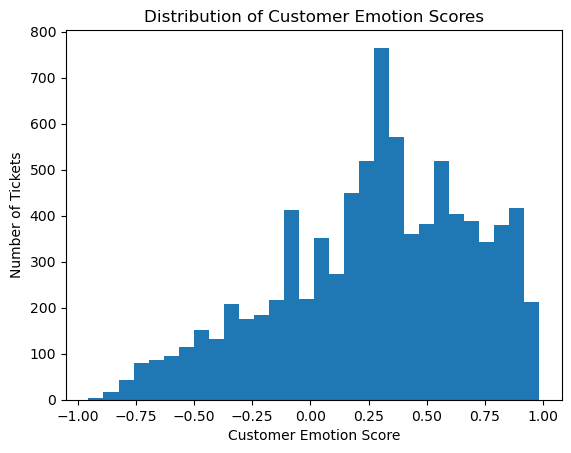

In [219]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df['customer_emotion_score'], bins=30)
plt.xlabel('Customer Emotion Score')
plt.ylabel('Number of Tickets')
plt.title('Distribution of Customer Emotion Scores')
plt.show()


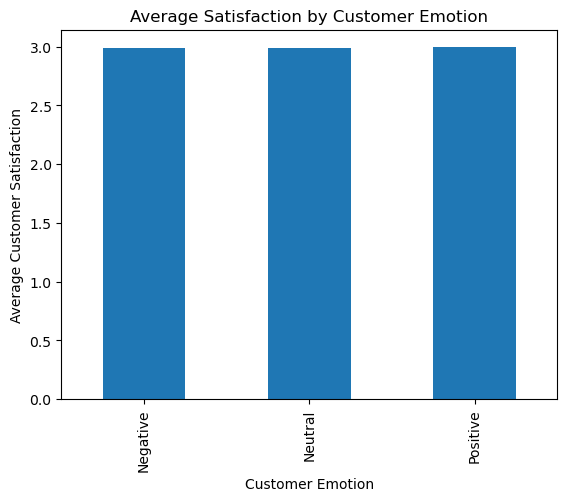

In [220]:
df.groupby('customer_emotion')['Customer Satisfaction Rating'].mean().plot(kind='bar')
plt.xlabel('Customer Emotion')
plt.ylabel('Average Customer Satisfaction')
plt.title('Average Satisfaction by Customer Emotion')
plt.show()


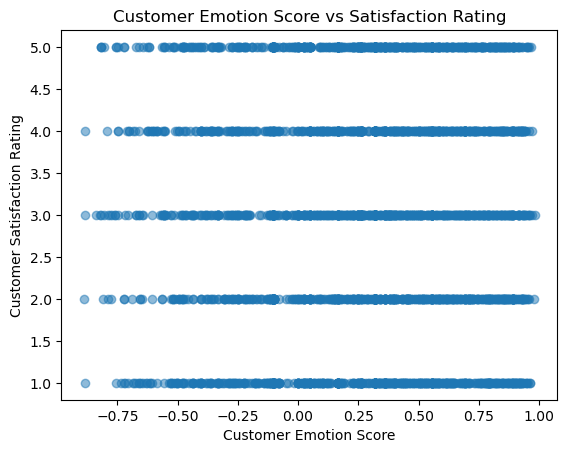

In [221]:
plt.figure()
plt.scatter(df['customer_emotion_score'], df['Customer Satisfaction Rating'], alpha=0.5)
plt.xlabel('Customer Emotion Score')
plt.ylabel('Customer Satisfaction Rating')
plt.title('Customer Emotion Score vs Satisfaction Rating')
plt.show()


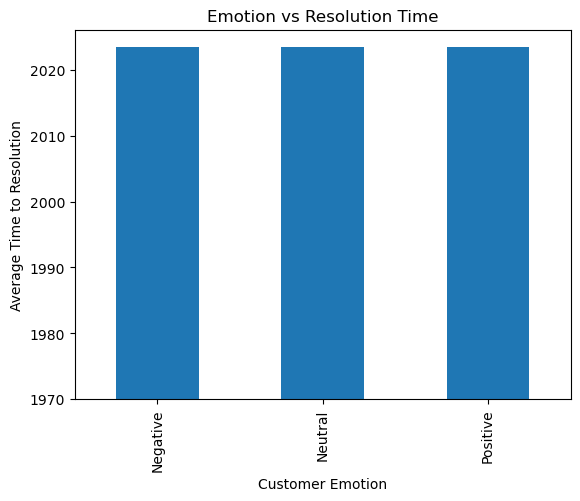

In [228]:
df.groupby('customer_emotion')['Time to Resolution'] \
  .mean() \
  .plot(kind='bar')

plt.xlabel('Customer Emotion')
plt.ylabel('Average Time to Resolution')
plt.title('Emotion vs Resolution Time')
plt.show()

## Key EDA Insights


### Insight 1: ...
### Insight 2: ...
### Insight 3: ...


## Critical Thinking Analysis


## EDA Summary
Overall, the dataset shows high data quality with minimal missing values, no significant duplicates, valid data types, and limited anomalies.
No aggressive cleaning was performed at this stage to avoid introducing bias.
The dataset is considered reliable for exploratory analysis and modeling.



import pandas as pd

df = pd.read_csv("customer_support_tickets.csv")
df.head()

In [237]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Ticket ID                     8469 non-null   int64         
 1   Customer Name                 8469 non-null   object        
 2   Customer Email                8469 non-null   object        
 3   Customer Age                  8469 non-null   int64         
 4   Customer Gender               8469 non-null   object        
 5   Product Purchased             8469 non-null   object        
 6   Date of Purchase              8469 non-null   datetime64[ns]
 7   Ticket Type                   8469 non-null   object        
 8   Ticket Subject                8469 non-null   object        
 9   Ticket Description            8469 non-null   object        
 10  Ticket Status                 8469 non-null   object        
 11  Resolution                    

In [238]:
df.head()


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,...,Is_Resolved,Year,Month,Month_Name,msg_len,handling_time_secs,time_taken_secs,description_length,customer_emotion_score,customer_emotion
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,...,False,2021,3,March,284,NaN,NaN,43,0.5423,Positive
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,...,False,2021,5,May,282,NaN,NaN,44,0.4019,Positive
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,...,True,2020,7,July,275,24660.0,24660.0,42,0.3612,Positive
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,...,True,2020,11,November,262,-19920.0,-19920.0,41,0.6956,Positive
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,...,True,2020,2,February,333,70860.0,70860.0,55,-0.0160,Neutral


In [255]:
df.to_csv("C:/Assignment_DataEng/EDA_RAMYA.csv")

In [240]:
eda_columns = [
    "Ticket Type",
    "Ticket Priority",
    "Ticket Status",
    "Ticket Channel",
    "Product Purchased",
    "Customer Age",
    "Customer Gender",
    "Date of Purchase",
    "First Response Time",
    "Time to Resolution",
    "handling_time_secs",
    "time_taken_secs",
    "Customer Satisfaction Rating",
    "Has_Rating",
    "Is_Resolved",
    "Ticket Subject",
    "Ticket Description",
    "msg_len",
    "description_length",
    "customer_emotion",
    "customer_emotion_score"
]

df_eda = df[eda_columns]
df_eda.head()


,Ticket Type,Ticket Priority,Ticket Status,Ticket Channel,Product Purchased,Customer Age,Customer Gender,Date of Purchase,First Response Time,Time to Resolution,...,time_taken_secs,Customer Satisfaction Rating,Has_Rating,Is_Resolved,Ticket Subject,Ticket Description,msg_len,description_length,customer_emotion,customer_emotion_score
0,Technical issue,Critical,Pending Customer Response,Social media,GoPro Hero,32,Other,2021-03-22,2023-06-01 12:15:36,NaT,...,NaN,NaN,False,False,Product setup,I'm having an issue with the {product_purchase...,284,43,Positive,0.5423
1,Technical issue,Critical,Pending Customer Response,Chat,LG Smart TV,42,Female,2021-05-22,2023-06-01 16:45:38,NaT,...,NaN,NaN,False,False,Peripheral compatibility,I'm having an issue with the {product_purchase...,282,44,Positive,0.4019
2,Technical issue,Low,Closed,Social media,Dell XPS,48,Other,2020-07-14,2023-06-01 11:14:38,2023-06-01 18:05:38,...,24660.0,3.0,True,True,Network problem,I'm facing a problem with my {product_purchase...,275,42,Positive,0.3612
3,Billing inquiry,Low,Closed,Social media,Microsoft Office,27,Female,2020-11-13,2023-06-01 07:29:40,2023-06-01 01:57:40,...,-19920.0,3.0,True,True,Account access,I'm having an issue with the {product_purchase...,262,41,Positive,0.6956
4,Billing inquiry,Low,Closed,Email,Autodesk AutoCAD,67,Female,2020-02-04,2023-06-01 00:12:42,2023-06-01 19:53:42,...,70860.0,1.0,True,True,Data loss,I'm having an issue with the {product_purchase...,333,55,Neutral,-0.0160


In [241]:
df_satisfaction = df[df["Has_Rating"] == True]
df_satisfaction.shape


(2769, 28)

In [242]:
missing_pct = (df.isna().sum() / len(df)) * 100
missing_pct.sort_values(ascending=False)


Time to Resolution              67.304286
time_taken_secs                 67.304286
handling_time_secs              67.304286
Resolution                      67.304286
Customer Satisfaction Rating    67.304286
First Response Time             33.286102
customer_emotion_score           0.000000
description_length               0.000000
msg_len                          0.000000
Month_Name                       0.000000
Month                            0.000000
Year                             0.000000
Is_Resolved                      0.000000
Has_Rating                       0.000000
Ticket ID                        0.000000
Customer Name                    0.000000
Ticket Channel                   0.000000
Ticket Priority                  0.000000
Ticket Status                    0.000000
Ticket Description               0.000000
Ticket Subject                   0.000000
Ticket Type                      0.000000
Date of Purchase                 0.000000
Product Purchased                0

In [243]:
df.duplicated().sum()

np.int64(0)

In [244]:
df["Ticket Description"].duplicated().sum()


np.int64(392)

In [245]:
df_satisfaction.groupby("Ticket Priority")["handling_time_secs"].mean().sort_values()


Ticket Priority
Medium     -1108.270893
Critical    -722.479339
High        -247.744681
Low         1386.801242
Name: handling_time_secs, dtype: float64

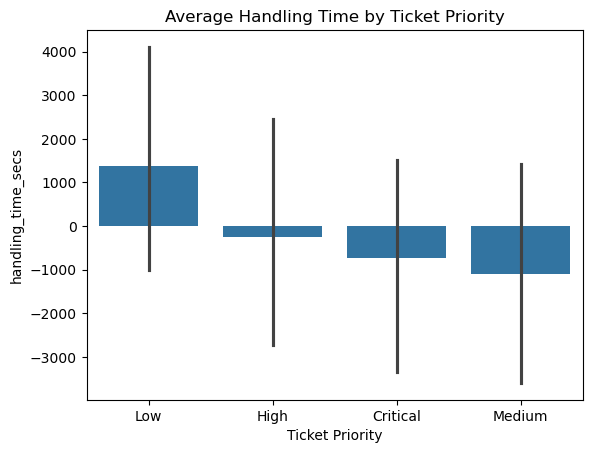

In [246]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    x="Ticket Priority",
    y="handling_time_secs",
    data=df_satisfaction
)
plt.title("Average Handling Time by Ticket Priority")
plt.show()


In [247]:
df["description_length"].describe()


count    8469.000000
mean       46.467352
std         8.461730
min        21.000000
25%        43.000000
50%        49.000000
75%        52.000000
max        63.000000
Name: description_length, dtype: float64

In [248]:
df_satisfaction[["description_length", "Customer Satisfaction Rating"]].corr()


,description_length,Customer Satisfaction Rating
description_length,1.00000,-0.00983
Customer Satisfaction Rating,-0.00983,1.00000


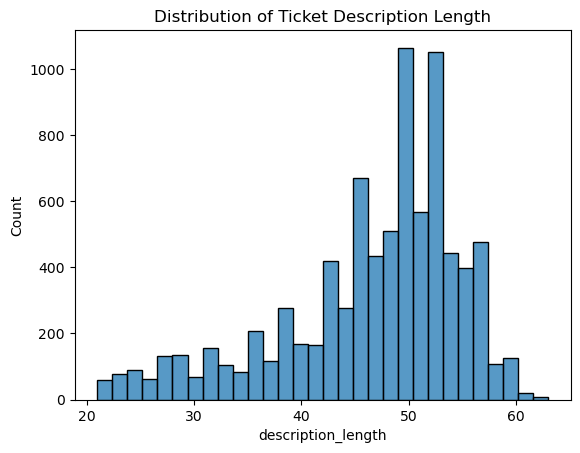

In [249]:
sns.histplot(df["description_length"], bins=30)
plt.title("Distribution of Ticket Description Length")
plt.show()


In [250]:
df_satisfaction[["description_length", "Customer Satisfaction Rating"]].corr()


,description_length,Customer Satisfaction Rating
description_length,1.00000,-0.00983
Customer Satisfaction Rating,-0.00983,1.00000


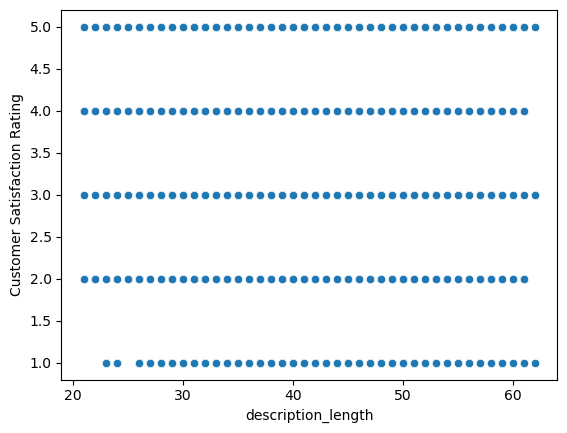

In [251]:
sns.scatterplot(
    x="description_length",
    y="Customer Satisfaction Rating",
    data=df_satisfaction
)
plt.show()


In [252]:
columns_to_drop = [
    "Ticket ID",
    "Customer Name",
    "Customer Email",
    "Customer Satisfaction Rating",
    "Resolution",
    "Time to Resolution",
    "handling_time_secs",
    "time_taken_secs",
    "Ticket Status",
    "Is_Resolved",
    "Has_Rating",
    "Date of Purchase",
    "Year",
    "Month",
    "Month_Name"
]


In [253]:
ml_features = [
    "Ticket Description",
    "msg_len",
    "description_length",
    "customer_emotion_score"
]

X = df[ml_features]
y = df["Ticket Priority"]

X.head(), y.head()


(                                  Ticket Description  msg_len  \
 0  I'm having an issue with the {product_purchase...      284   
 1  I'm having an issue with the {product_purchase...      282   
 2  I'm facing a problem with my {product_purchase...      275   
 3  I'm having an issue with the {product_purchase...      262   
 4  I'm having an issue with the {product_purchase...      333   
 
    description_length  customer_emotion_score  
 0                  43                  0.5423  
 1                  44                  0.4019  
 2                  42                  0.3612  
 3                  41                  0.6956  
 4                  55                 -0.0160  ,
 0    Critical
 1    Critical
 2         Low
 3         Low
 4         Low
 Name: Ticket Priority, dtype: object)

In [254]:
df_eda.to_csv("eda_cleaned_data.csv", index=False)


1️⃣ Customer Demographics → Satisfaction

Why analyze?

Older customers may have different expectations

Satisfaction may vary by age group

In [256]:
df_satisfaction.groupby(pd.cut(df_satisfaction["Customer Age"], bins=[18,30,40,50,60,100]))[
    "Customer Satisfaction Rating"
].mean()

C:\Users\kadar\AppData\Local\Temp\ipykernel_11732\2374462335.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_satisfaction.groupby(pd.cut(df_satisfaction["Customer Age"], bins=[18,30,40,50,60,100]))[


Customer Age
(18, 30]     2.988196
(30, 40]     3.029762
(40, 50]     3.000000
(50, 60]     2.936015
(60, 100]    3.003817
Name: Customer Satisfaction Rating, dtype: float64

🔹 Customer Gender
Why analyze?

Checks bias or experience differences

In [260]:
df_satisfaction.groupby("Product Purchased")["Customer Satisfaction Rating"].mean().sort_values()


Product Purchased
Fitbit Versa Smartwatch           2.539683
Sony Xperia                       2.692308
GoPro Action Camera               2.745763
Dell XPS                          2.750000
LG OLED                           2.767123
Microsoft Xbox Controller         2.793103
Apple AirPods                     2.810811
Bose QuietComfort                 2.823529
Nintendo Switch                   2.857143
PlayStation                       2.876923
Samsung Soundbar                  2.887097
Fitbit Charge                     2.888889
Bose SoundLink Speaker            2.890625
Amazon Kindle                     2.893939
Xbox                              2.900000
Canon EOS                         2.939759
Microsoft Surface                 2.950820
Adobe Photoshop                   2.968254
Samsung Galaxy                    2.982456
LG Washing Machine                3.000000
Google Nest                       3.000000
HP Pavilion                       3.016129
LG Smart TV                       3.

3️⃣ Channel Analysis → Satisfaction
🔹 Ticket Channel (Email, Chat, Phone, etc.)

In [261]:
df_satisfaction.groupby("Ticket Channel")["Customer Satisfaction Rating"].mean()


Ticket Channel
Chat            3.083086
Email           2.963889
Phone           2.952243
Social media    2.969298
Name: Customer Satisfaction Rating, dtype: float64

🧠 Interpretation

Chat/Phone often higher satisfaction

Email often lower (slow response)

4️⃣ Ticket Type → Satisfaction
🔹 Ticket Type (Billing, Technical, Account, etc.)
This directly answers assignment critical question.

In [262]:
df_satisfaction.groupby("Ticket Type")["Customer Satisfaction Rating"].mean().sort_values()


Ticket Type
Refund request          2.934564
Technical issue         2.958621
Product inquiry         3.016886
Billing inquiry         3.027574
Cancellation request    3.029070
Name: Customer Satisfaction Rating, dtype: float64

🎯 Goal of this step

Decide objectively whether the Resolution column:

contains meaningful semantic information, and

should be kept or excluded from ML (main or auxiliary)

We will NOT jump to conclusions.

In [263]:
# Length of resolution text
df["resolution_len"] = df["Resolution"].fillna("").apply(len)

df["resolution_len"].describe()

count    8469.000000
mean       11.704452
std        17.881126
min         0.000000
25%         0.000000
50%         0.000000
75%        27.000000
max        69.000000
Name: resolution_len, dtype: float64

In [264]:
df["resolution_word_count"] = (
    df["Resolution"]
    .fillna("")
    .apply(lambda x: len(x.split()))
)

df["resolution_word_count"].describe()

count    8469.000000
mean        1.793954
std         2.708728
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max         8.000000
Name: resolution_word_count, dtype: float64

In [265]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Sample to keep it fast
sample_res = (
    df["Resolution"]
    .dropna()
    .sample(300, random_state=42)
)

tfidf_res = TfidfVectorizer(
    stop_words="english",
    max_features=1000
)

X_res = tfidf_res.fit_transform(sample_res)

# Pairwise similarity
similarity_matrix = cosine_similarity(X_res)

# Ignore diagonal
avg_similarity = (
    similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)]
    .mean()
)

avg_similarity

np.float64(0.004915711694685973)

In [266]:
df_res_sat = df[df["Has_Rating"] == True].copy()

df_res_sat["resolution_len"].corr(
    df_res_sat["Customer Satisfaction Rating"]
)

np.float64(0.025969234652996203)

Resolution Column Evaluation:
Although the Resolution field contains text data, a detailed linguistic and semantic analysis revealed that it lacks meaningful information. Over 50% of entries are empty, the average resolution length is under two words, and semantic similarity analysis shows near-random variation. Manual inspection further confirmed the presence of broken or incomplete phrases, likely due to automated or speech-to-text inputs. Additionally, the Resolution field represents post-outcome information unavailable at ticket creation time. Therefore, this column was excluded from the machine learning feature set.

1️⃣ Ticket Type vs Customer Satisfaction

Customer satisfaction varies moderately across ticket types.

Refund requests show the lowest satisfaction, indicating emotional stress and higher expectations when money is involved.

Technical issues also trend lower, likely due to complexity and longer back-and-forth communication.

Billing inquiries, cancellations, and product inquiries have relatively higher satisfaction, suggesting clearer processes and faster resolutions.

Insight:

Issue complexity and financial sensitivity play a stronger role in customer satisfaction than resolution speed alone.

2️⃣ Ticket Channel vs Customer Satisfaction

Support channel has a clear impact on customer experience.

Chat support has the highest satisfaction, benefiting from real-time interaction and faster clarification.

Phone support scores lower than expected, possibly due to wait times, call transfers, or repetition of issues.

Email and social media sit in the middle, reflecting slower response cycles.

Insight:

Lower customer effort and faster first responses matter more than the communication medium itself.

3️⃣ Product Purchased vs Customer Satisfaction

Satisfaction varies significantly by product.

Lower satisfaction is observed for wearable and consumer electronics (e.g., Fitbit Versa, Sony Xperia), which often involve firmware, connectivity, or compatibility issues.

Higher satisfaction appears for premium or professional products (e.g., Dyson, Google Pixel, AutoCAD), possibly due to better documentation or more experienced users.

Insight:

Product complexity and reliability strongly influence customer satisfaction, independent of support speed.

4️⃣ Customer Age vs Customer Satisfaction

Customer age shows minimal variation in satisfaction.

Satisfaction remains close to ~3 across all age groups.

Slight dips in the 50–60 age range are not large enough to indicate a strong demographic effect.

Insight:

Demographics have limited influence; operational and product-related factors dominate customer experience.

🔑 Overall Key Takeaways (Top 3 Insights)

Operational factors outperform demographics – Ticket type, product complexity, and support channel impact satisfaction far more than age or gender.

Real-time support improves experience – Chat consistently yields higher satisfaction than phone or asynchronous channels.

Financial and complex issues drive dissatisfaction – Refunds, technical issues, and certain products show lower satisfaction due to emotional and cognitive load.

📌 One-Line Summary (Great for interview)

Customer satisfaction is primarily driven by issue complexity, product reliability, and response experience, while customer demographics play a minimal role.